# Modelisation et Développment d'un modèle de prédiction de l'éligibilité pour un prêt bancaire

In [1]:
#Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:

#Importation du fichier train_u6lujuX_CVtuZ9i (1).csv
df=pd.read_csv('./dataset/train_u6lujuX_CVtuZ9i (1).csv')

#Affichage des premières lignes du fichier
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop(['Loan_ID',],axis=1,inplace=True)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Nettoyage des données

In [47]:
#Taille du fichier
df.shape

(614, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [49]:
#Statistiques descriptives
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [50]:
#pourcentage de valeurs manquantes
df.isnull().sum()* 100 / len(df) 

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [51]:
#Séparation des colonnes catégoriques et numériques
df_categorical = df.select_dtypes(include='object')  
df_numerical = df.select_dtypes(exclude='object')

## Analyse exploratoire des données

Nous supprimerons ces valeurs nulles plus tard, d'abord quelques visualisations.

(-1.199399001529517,
 1.1993991177588639,
 -1.0571682573383985,
 1.142831596254752)

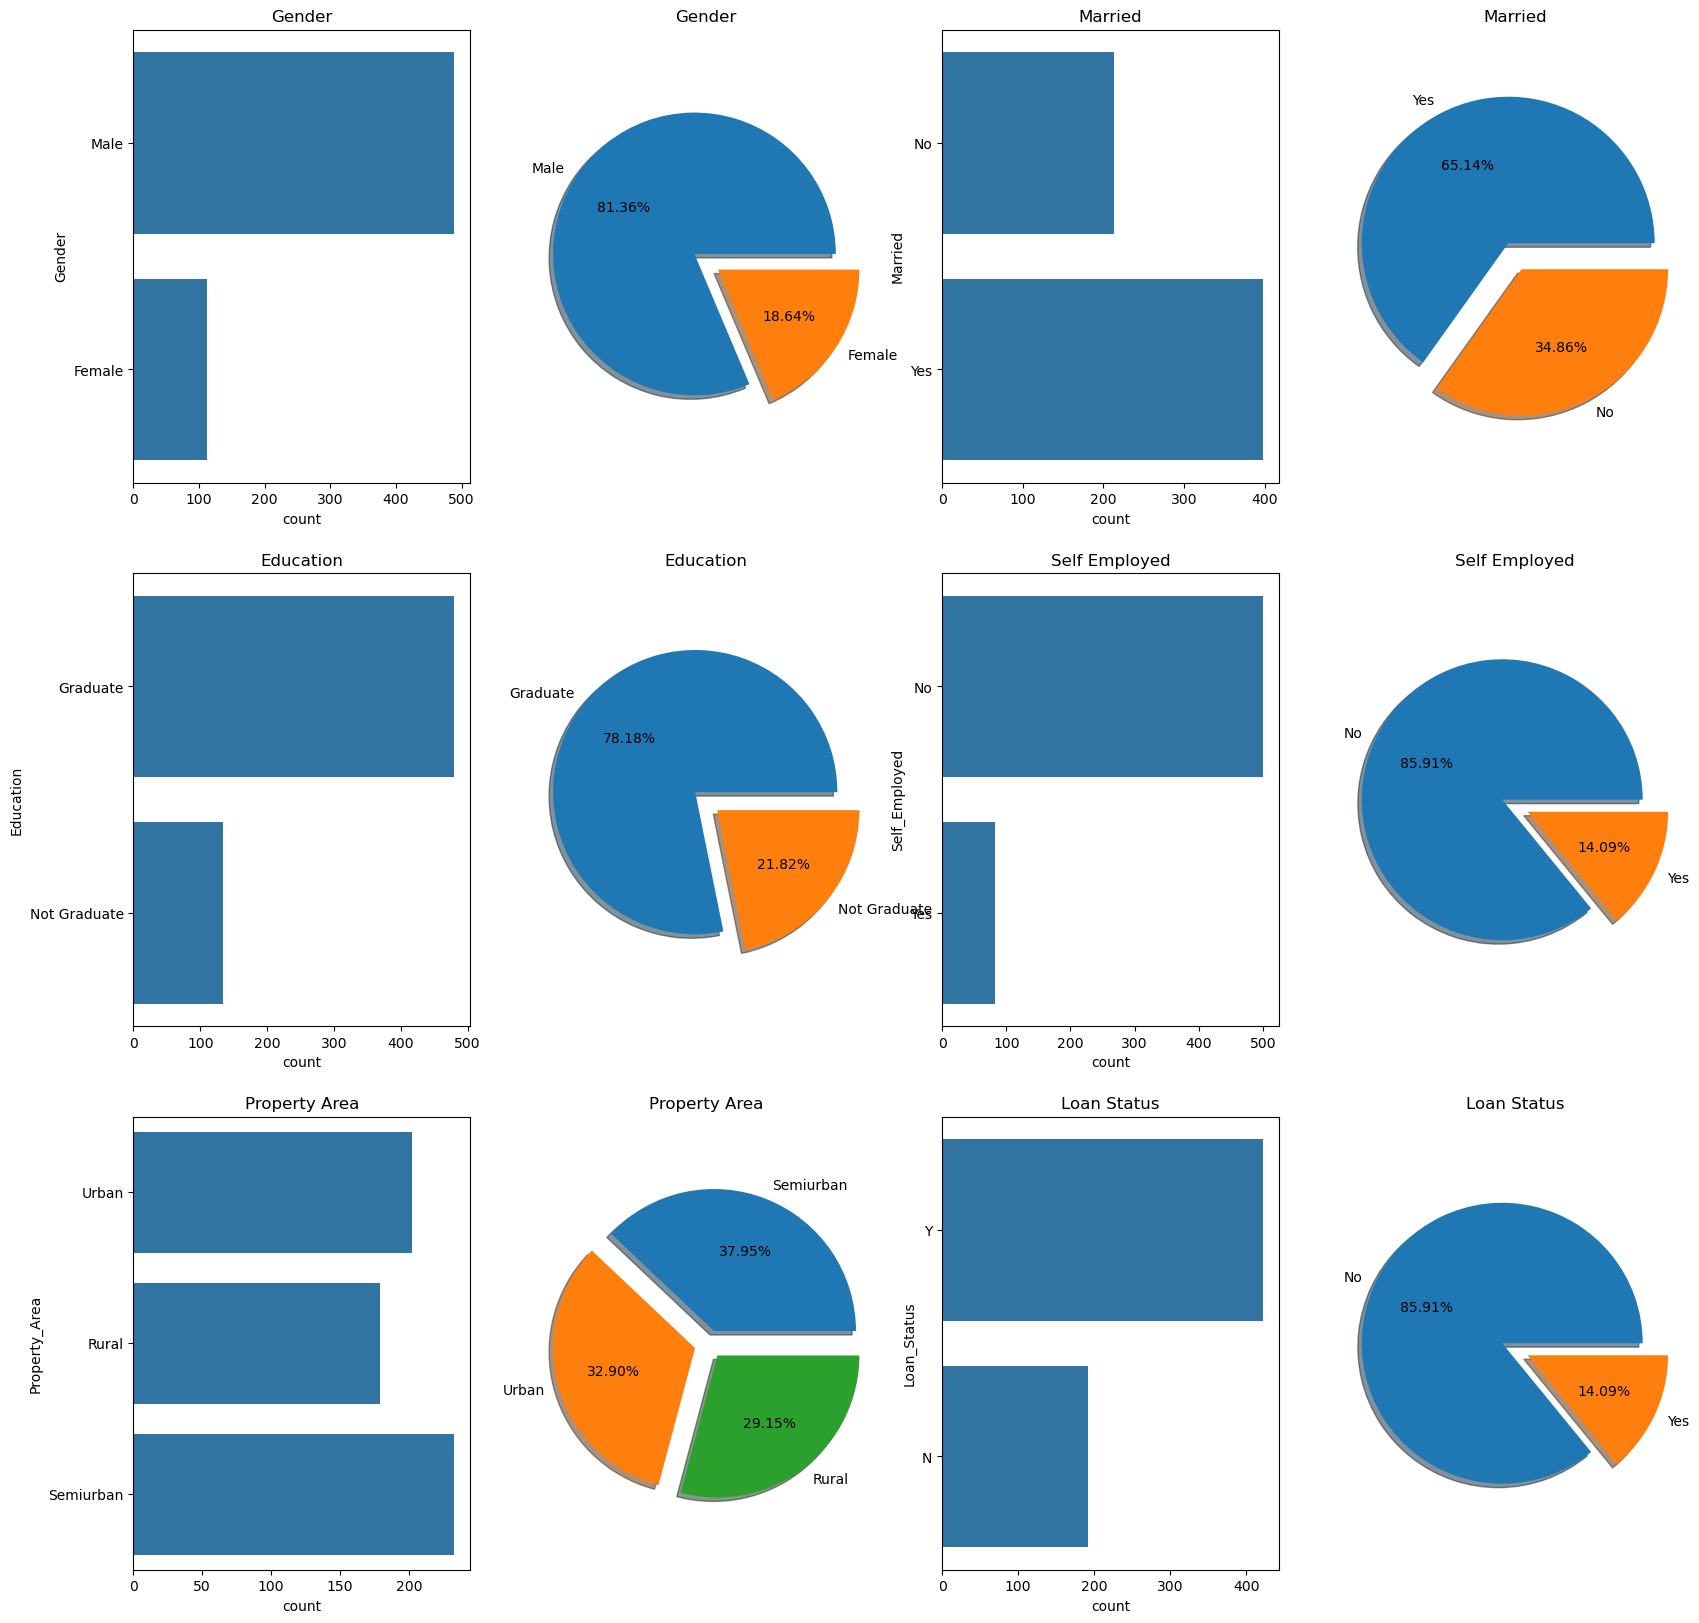

In [16]:
#visulisation des données catégoriques

plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.countplot(df.Gender)
plt.title('Gender') 
plt.subplot(3,4,2)
Gender = df.Gender.value_counts()
plt.pie(Gender,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Gender.index)
plt.title('Gender')
plt.axis('equal')


plt.subplot(3,4,3)
sns.countplot(df.Married)
plt.title('Married') 
plt.subplot(3,4,4)
Married = df.Married.value_counts()
plt.pie(Married,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Married.index)
plt.title('Married')
plt.axis('equal')

plt.subplot(3,4,5)
sns.countplot(df.Education)
plt.title('Education') 
plt.subplot(3,4,6)
Education = df.Education.value_counts()
plt.pie(Education,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Education.index)
plt.title('Education')
plt.axis('equal')

plt.subplot(3,4,7)
sns.countplot(df.Self_Employed)
plt.title('Self Employed') 
plt.subplot(3,4,8)
Self_Employed = df.Self_Employed.value_counts()
plt.pie(Self_Employed,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Self_Employed.index)
plt.title('Self Employed')
plt.axis('equal')

plt.subplot(3,4,9)
sns.countplot(df.Property_Area)
plt.title('Property Area') 
plt.subplot(3,4,10)
Property_Area = df.Property_Area.value_counts()
plt.pie(Property_Area,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Property_Area.index)
plt.title('Property Area')
plt.axis('equal')

plt.subplot(3,4,11)
sns.countplot(df.Loan_Status)
plt.title('Loan Status') 
plt.subplot(3,4,12)
Loan_Status = df.Self_Employed.value_counts()
plt.pie(Loan_Status,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Loan_Status.index)
plt.title('Loan Status')
plt.axis('equal')


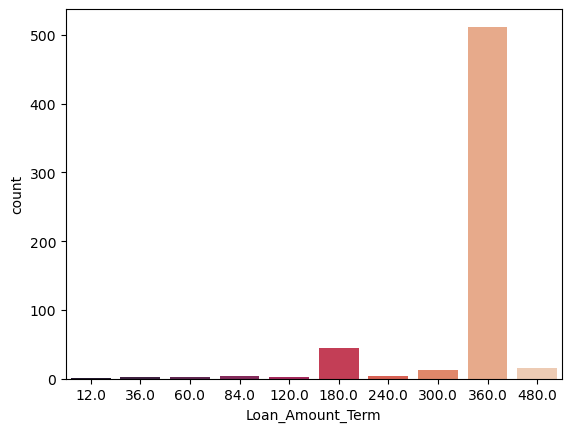

In [17]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

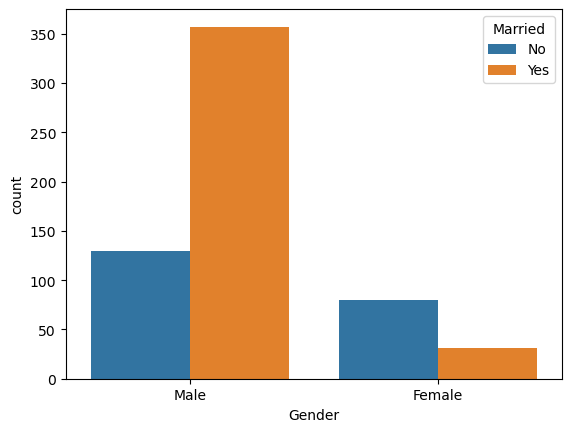

In [19]:
sns.countplot(data=df, x='Gender', hue='Married')

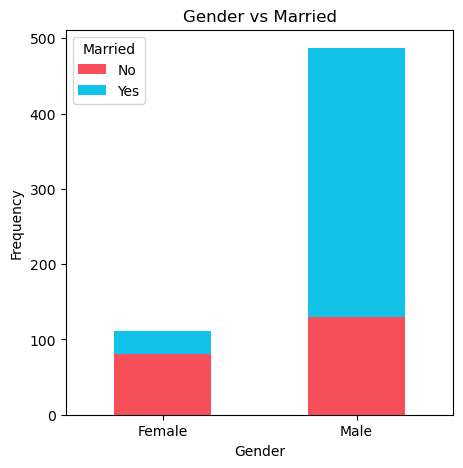

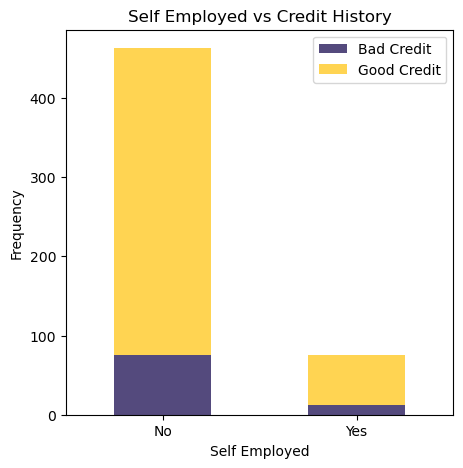

In [20]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5),color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

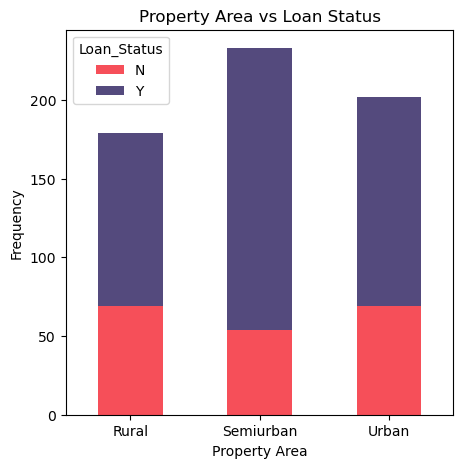

In [21]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#544a7d'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [52]:
#valeurs numériques
df_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


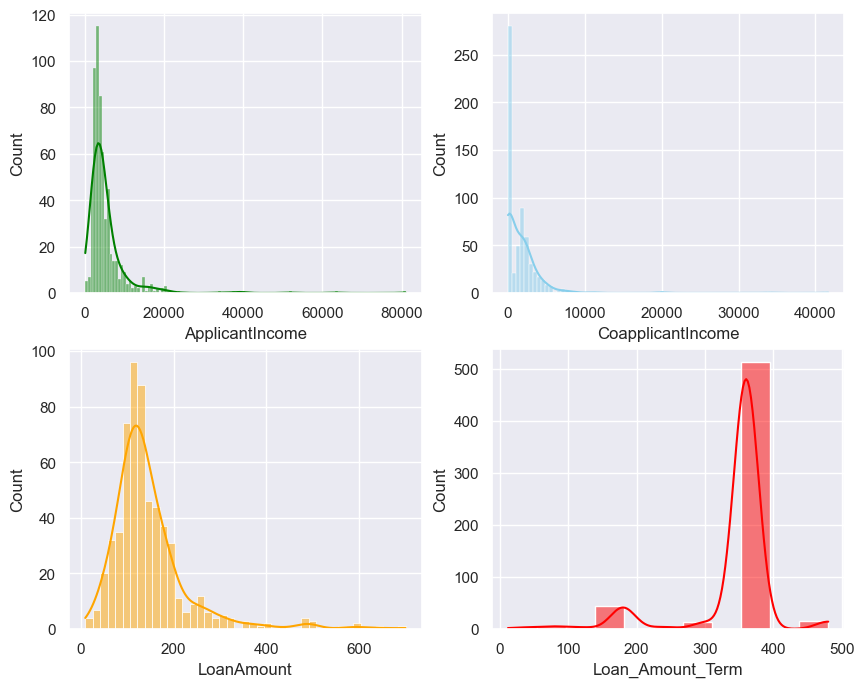

In [24]:
#histogrammes des valeurs numériques

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red');

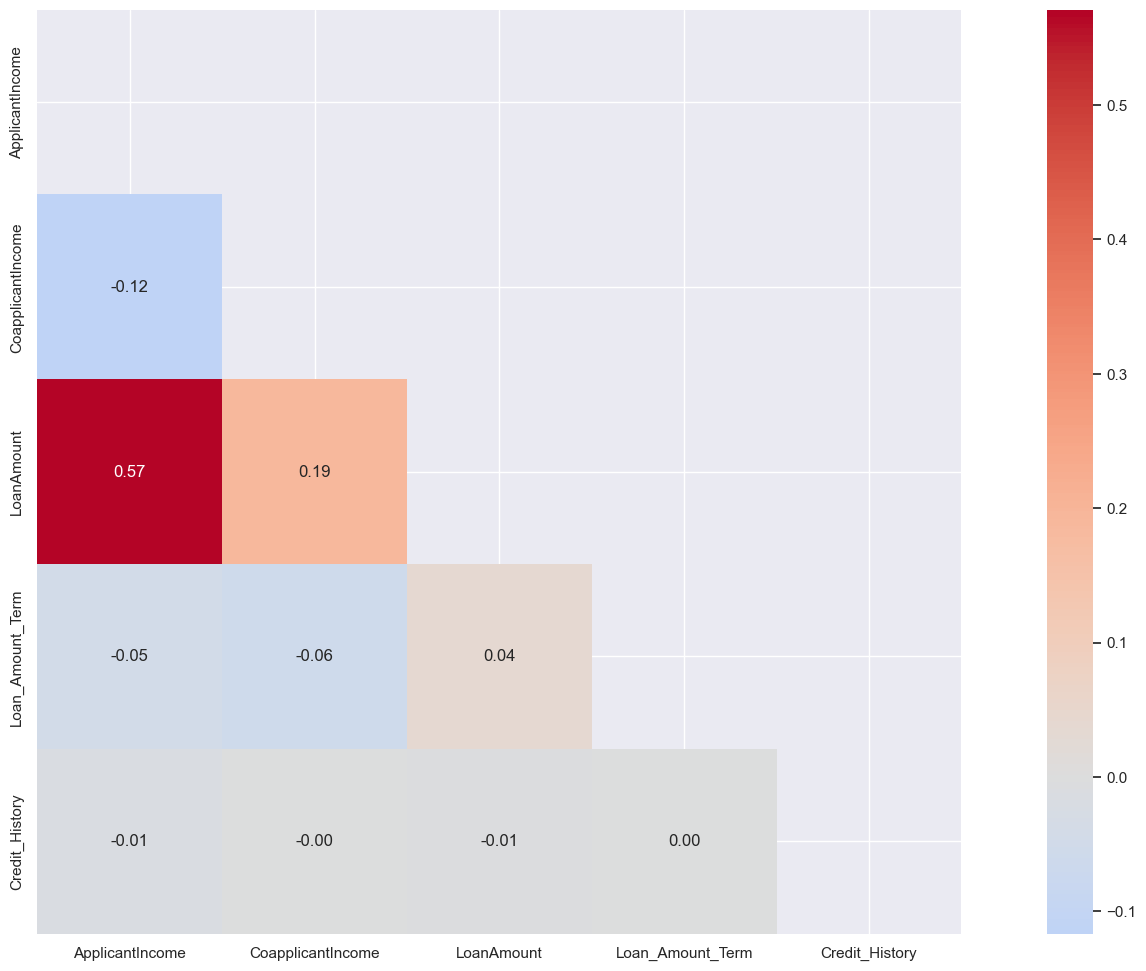

In [27]:
#Matrice de corrélation pour les valeurs numériques
matrix = df_numerical.corr()
mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,mask=mask,annot=True,center=0,fmt='.2f',square=True,cmap="coolwarm")
plt.show()

In [53]:
df_numerical.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


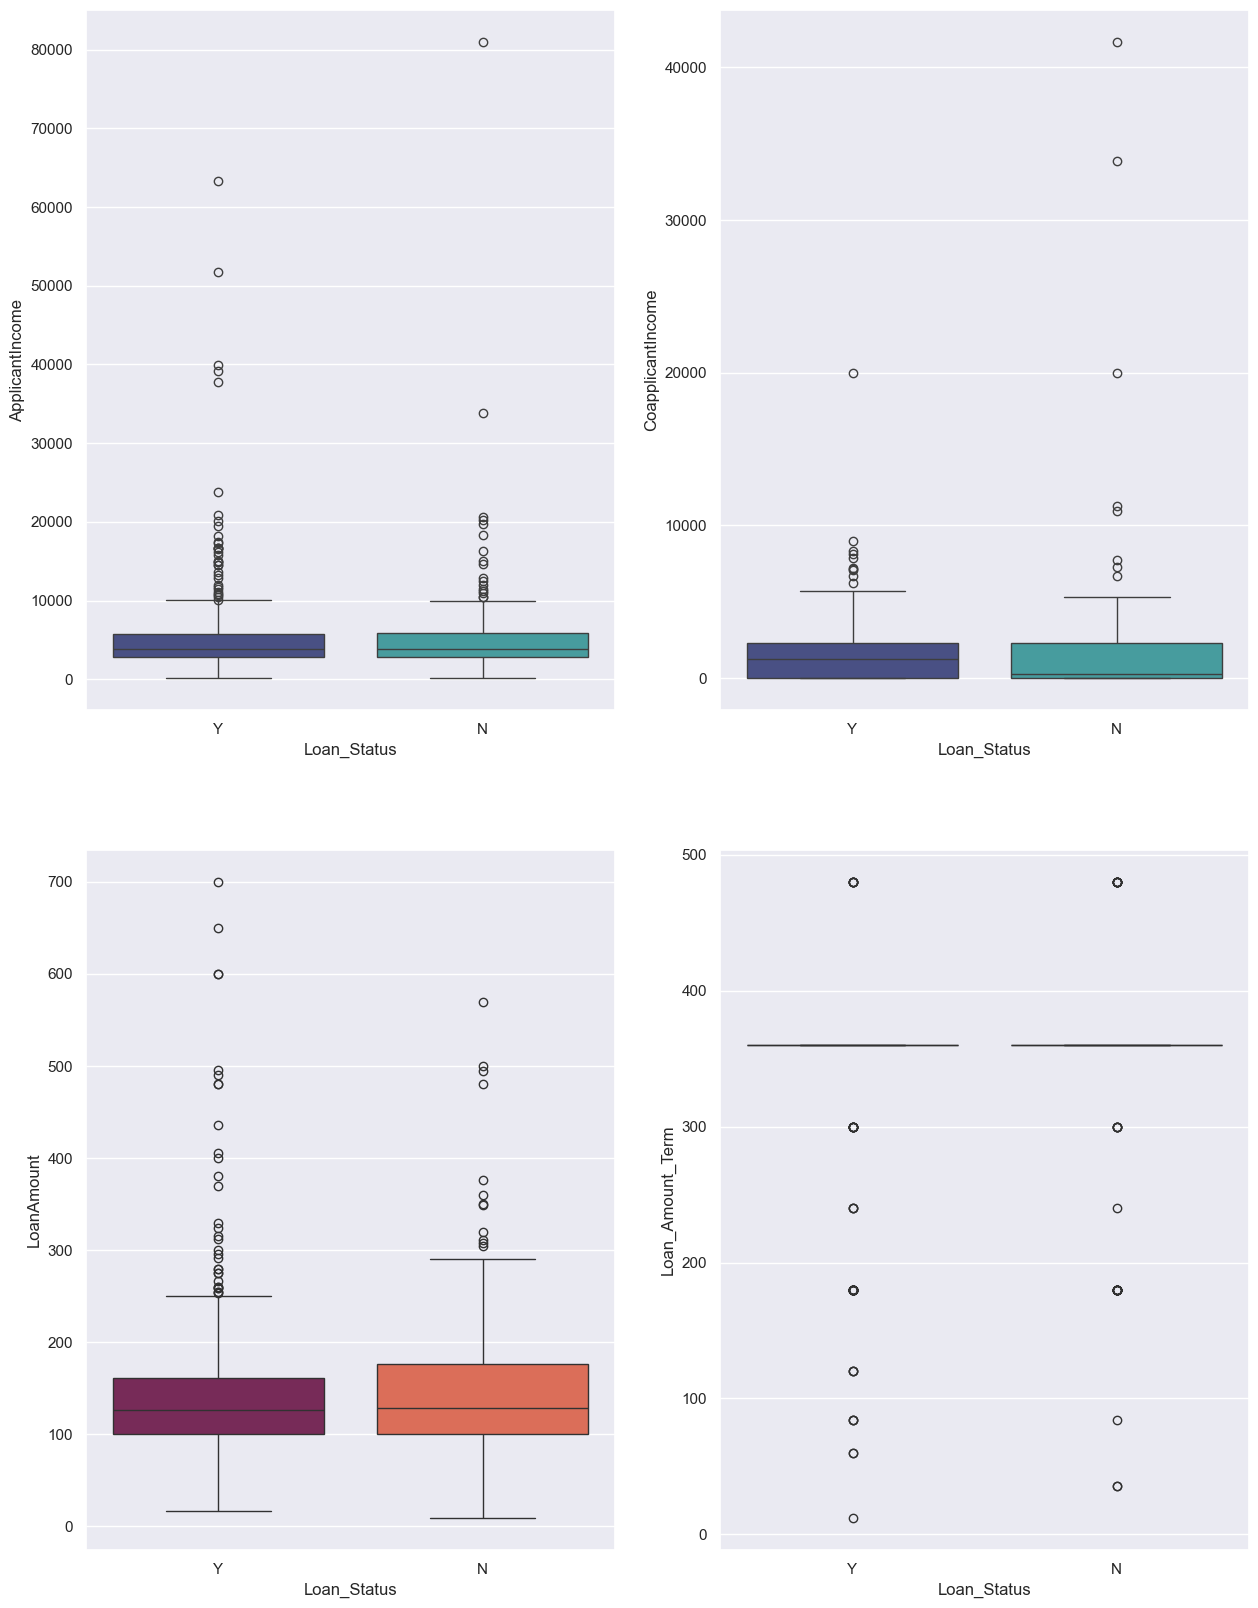

In [28]:
#Boxplots pour les valeurs numériques entre les variables Loan_Status et les variables numériques

plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");


plt.subplot(2,2,2)
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=df, palette="mako");

plt.subplot(2,2,3)
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="rocket");

plt.subplot(2,2,4)
sns.boxplot(x="Loan_Status", y="Loan_Amount_Term", data=df, palette="rocket");

**Observations - Il existe des valeurs aberrantes dans l'ensemble de données, puisque l'ensemble de données est très petit, la suppression des valeurs aberrantes réduira encore la taille de l'ensemble de données. Par conséquent, nous allons continuer comme cela.**

### Gestion des valeurs nulles :

<Axes: >

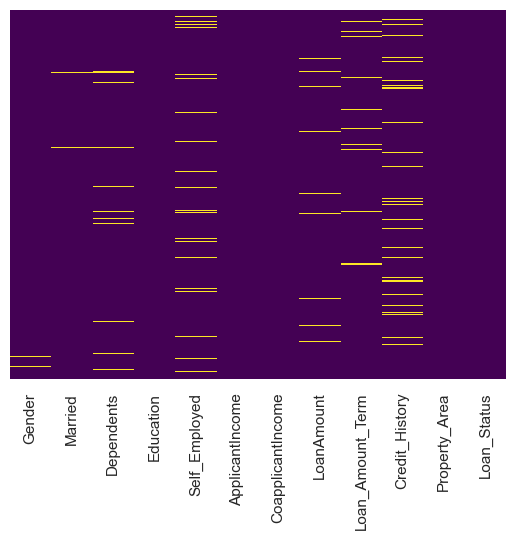

In [29]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


L'ensemble de données contient des valeurs nulles. Nous allons les remplacer par la valeur modale pour les variables catégoriques et la valeur moyenne pour les variables numériques.

In [56]:
# for categorical variables we will use 'mode' to fill null values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [57]:
# for numerical variables we will use 'mean' to fill null values
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

<Axes: >

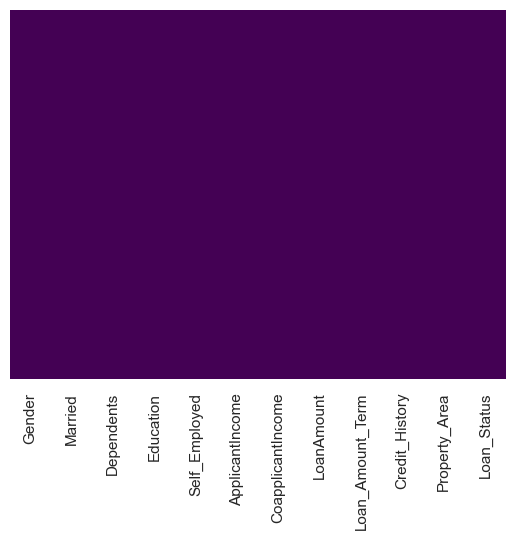

In [58]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Nous avons rempli les valeurs nulles pour les variables catégoriques et les variables numériques.

In [59]:
df.isnull().sum()* 100 / len(df) 

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [60]:
df.tail(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
594,Male,Yes,0,Graduate,Yes,16120,0.0,260.000000,360.0,1.0,Urban,Y
595,Male,No,0,Not Graduate,No,3833,0.0,110.000000,360.0,1.0,Rural,Y
596,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.000000,360.0,1.0,Rural,N
597,Male,No,0,Graduate,No,2987,0.0,88.000000,360.0,0.0,Semiurban,N
598,Male,Yes,0,Graduate,Yes,9963,0.0,180.000000,360.0,1.0,Rural,Y
599,Male,Yes,2,Graduate,No,5780,0.0,192.000000,360.0,1.0,Urban,Y
600,Female,No,3+,Graduate,No,416,41667.0,350.000000,180.0,1.0,Urban,N
601,Male,Yes,0,Not Graduate,No,2894,2792.0,155.000000,360.0,1.0,Rural,Y
602,Male,Yes,3+,Graduate,No,5703,0.0,128.000000,360.0,1.0,Urban,Y
603,Male,No,0,Graduate,No,3676,4301.0,172.000000,360.0,1.0,Rural,Y


### Encodage one-hot pour les colonnes catégoriques

In [61]:
#affichage des valeurs uniques de chaque colonne catégorique
df_categorical = df.select_dtypes(include='object')
for column in df_categorical:
    print(f'{column}: {df_categorical[column].unique()}')

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [62]:
df.Gender.replace(('Male', 'Female'), (1, 0), inplace=True) 
df.Married.replace(('Yes', 'No'), (1, 0), inplace=True) 
df.Education.replace(('Graduate', 'Not Graduate'), (1, 0), inplace=True) 
df.Self_Employed.replace(('Yes', 'No'), (1, 0), inplace=True) 
df.Loan_Status.replace(('Y', 'N'), (1, 0), inplace=True) 

In [63]:
df.Dependents.replace(('3+'), (3), inplace=True) 

In [64]:
df = pd.get_dummies(data=df, columns=['Dependents','Property_Area'],drop_first=True)

In [65]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,True,False,False,False,True
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,False,True,False,False,False
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,True,False,False,False,True
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,True,False,False,False,True
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,1,True,False,False,False,True


In [66]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [67]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,True,False,False,False,True
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,False,True,False,False,False
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,True,False,False,False,True
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,True,False,False,False,True
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,True,False,False,False,True


In [68]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [69]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [70]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
y_train.value_counts()

Loan_Status
1    312
0    148
Name: count, dtype: int64

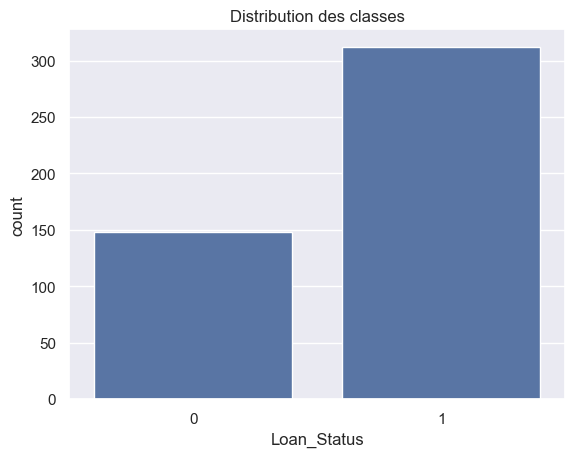

In [74]:
#distribution des valeurs de la colonne Loan_Status
sns.countplot(data=pd.DataFrame(y_train, columns=['Loan_Status']), x='Loan_Status')
plt.title('Distribution des classes')
plt.show()


### Comme l'ensemble de données est déséquilibré, nous utiliserons SMOTE pour équilibrer la colonne cible (uniquement sur l'ensemble de formation)

In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [76]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [77]:
y_train.value_counts()

Loan_Status
1    312
0    312
Name: count, dtype: int64

## Entraînement des modèles

In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

ModelLR = LogisticRegression()
ModelRF = RandomForestClassifier(n_estimators=100)
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
ModelXGB = XGBClassifier()
ModelADA = AdaBoostClassifier()

In [318]:
MM = [ModelLR, ModelRF,ModelKNN,ModelLGB,ModelGNB,ModelXGB,ModelADA]
score_test_list = []
score_train_list = []
recall_list = [] 
precision_list = []
f1Score_list = []
accuracy_list = []

for models in MM:
    models.fit(X_train, y_train)
    score_train = models.score(X_train,y_train)
    score_test = models.score(X_test,y_test)

     
    
    # Prediction
    
    y_pred = models.predict(X_test)
    y_pred_prob = models.predict_proba(X_test)
    
    
     # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred
    
    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)

    
    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)


    # classification report for precision, recall f1-score and accuracy


    # calculating the metrics

    recall = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1Score_list.append(f1Score)
    
    score_test_list.append(score_test)
    score_train_list.append(score_train)
    


In [319]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'KNeighbors Classifier','LGBM Classifier','GaussianNB','XGBClassifier','ADABoost'
             ],
    
    'Score_train': [score_train_list[0], score_train_list[1],score_train_list[2] ,score_train_list[3] ,score_train_list[4],score_train_list[5],score_train_list[6]   
                   ],
    'Score_test': [score_test_list[0], score_test_list[1], score_test_list[2] , score_test_list[3] , score_test_list[4] , score_test_list[5], score_test_list[6]  
                   ],
    'Recall': [recall_list[0], recall_list[1], recall_list[2], recall_list[3], recall_list[4], recall_list[5], recall_list[6]
                   ],               

    'Precision': [precision_list[0], precision_list[1], precision_list[2], precision_list[3], precision_list[4], precision_list[5],precision_list[6] 
                   ], 

    'F1 Score': [f1Score_list[0], f1Score_list[1], f1Score_list[2], f1Score_list[3], f1Score_list[4], f1Score_list[5],f1Score_list[6] 
                   ],

})


In [320]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test,Recall,Precision,F1 Score
1,Random Forest Classifier,1.000000,0.779221,0.870,0.825,0.847
5,XGBClassifier,1.000000,0.727273,0.787,0.817,0.802
3,LGBM Classifier,0.996815,0.753247,0.815,0.830,0.822
2,KNeighbors Classifier,0.867834,0.655844,0.704,0.784,0.741
6,ADABoost,0.823248,0.701299,0.741,0.816,0.777
0,Logistic Regression,0.716561,0.714286,0.778,0.808,0.792
4,GaussianNB,0.679936,0.798701,0.926,0.813,0.866


**Observation- Random Forest et XGBoost sont les deux algorithmes les plus performants, hyper-réglons les paramètres de ces deux-là**

In [321]:
params1 = {
               'n_estimators': [100, 500,1000],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth' : [4,6,8],
               'min_samples_leaf': [4, 8,10],
               'min_samples_split': [5,10,14],
               'criterion' :['gini', 'entropy']
          }
 

In [322]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
classifier1 = RandomForestClassifier()

random_search = RandomizedSearchCV(classifier1, param_distributions=params1, n_iter=3, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train,y_train)

random_search.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomForestClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_leaf=8, min_samples_split=14,
                       n_estimators=500)

In [332]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_leaf=8, min_samples_split=14,
                       n_estimators=500) 
rfc.fit(X_train,y_train)
prediction_rfc = rfc.predict(X_test)
rfc.score(X_test,y_test)
print("Random Forest accuracy: {} ".format(rfc.score(X_test,y_test)))
print("")
print("Confusion_matrix:")
print("")
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_rfc))
print("")
print(classification_report(y_test,prediction_rfc))
print("")
print("Validation Mean F1 Score: ",cross_val_score(rfc,X_train,y_train,cv=5,scoring='f1_macro').mean())

Random Forest accuracy: 0.7597402597402597 

Confusion_matrix:

[[24 22]
 [15 93]]

              precision    recall  f1-score   support

           0       0.62      0.52      0.56        46
           1       0.81      0.86      0.83       108

    accuracy                           0.76       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154


Validation Mean F1 Score:  0.7220126467602936


In [329]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [330]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,StratifiedKFold, StratifiedShuffleSplit
classifier = XGBClassifier()

random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train,y_train)

random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [326]:
classifier = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=3,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=10)
score.mean()

0.7510312004230567

In [337]:
classifier.fit(X_train,y_train)
prediction_xgb = classifier.predict(X_test)
classifier.score(X_test,y_test)
print("XGBoost accuracy: {} ".format(classifier.score(X_test,y_test)))
print("")
print("Confusion_matrix:")
print("")
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_xgb))
print("")
print(classification_report(y_test,prediction_xgb))
print("")
print("Validation Mean F1 Score: ",cross_val_score(classifier,X_train,y_train,cv=5,scoring='f1_macro').mean())

XGBoost accuracy: 0.7272727272727273 

Confusion_matrix:

[[27 19]
 [23 85]]

              precision    recall  f1-score   support

           0       0.54      0.59      0.56        46
           1       0.82      0.79      0.80       108

    accuracy                           0.73       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.73      0.73      0.73       154


Validation Mean F1 Score:  0.7812050935536103


In [338]:
### Créez un fichier Pickle du modèle XGBoost qui sera utilisé pour la prédiction
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [343]:
### Créez un fichier Pickle en utilisant la sérialisation pour l'objet scaler standard.
pickle_out = open("sc.pkl","wb")
pickle.dump(sc, pickle_out)
pickle_out.close()